In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean
import math
from collections import Counter

In [8]:
pd.set_option("display.precision", 20)
sheet = pd.read_csv('metrics.csv')
sheet

,Timestamp,Session_Id,Brick_Count,Attempts,Level_Number,Collectibles,DeathByEnemy,DeathByFall,TimeTaken
0,10/18/2022 17:14:35,"6,38,01,71,00,76,45,30,000.00",2,3,1,3,0,2,42.58500000000000085265
1,10/18/2022 17:30:35,"6,38,01,71,10,34,52,00,000.00",2,6,1,3,2,3,60.79999999999999715783
2,10/18/2022 18:35:28,"6,38,01,71,49,27,38,10,000.00",2,2,1,3,1,0,22.55099999999999837996
3,10/18/2022 18:35:57,"6,38,01,71,49,56,33,10,000.00",2,2,2,6,0,1,27.64999999999999857891
4,10/18/2022 18:39:47,"6,38,01,71,51,86,40,70,000.00",2,7,1,3,3,3,41.69300000000000494538
...,...,...,...,...,...,...,...,...,...
299,10/24/2022 14:31:47,"6,38,02,21,87,03,35,90,000.00",2,7,2,3,2,4,57.44899999999999806732
300,10/24/2022 14:34:07,"6,38,02,21,88,43,58,30,000.00",2,12,2,5,0,11,138.36500000000000909495
301,10/24/2022 14:34:59,"6,38,02,21,88,95,55,60,000.00",2,8,2,4,0,7,44.49499999999999744205
302,10/24/2022 14:36:13,"6,38,02,21,89,72,76,30,000.00",4,6,1,2,1,4,61.83299999999999840838


In [56]:
brick_count = sheet['Brick_Count'].to_list()
attempts = sheet['Attempts'].to_list()
level_no = sheet['Level_Number'].to_list()
collectibles = sheet['Collectibles'].to_list()
dbenemy = sheet['DeathByEnemy'].to_list()
dbfall = sheet['DeathByFall'].to_list()
timetaken = sheet['TimeTaken'].to_list()
sesh = sheet['Session_Id']
highestlevel = {}

levels = set(level_no)
br = [[] for i in range(len(levels))]
at = [[] for i in range(len(levels))]
coll = [[] for i in range(len(levels))]
dbe = [[] for i in range(len(levels))]
dbf = [[] for i in range(len(levels))]
tt = [[] for i in range(len(levels))]

for i in range(len(brick_count)):
    ln = level_no[i]
    br[ln-1].append(brick_count[i])
    at[ln-1].append(attempts[i])
    coll[ln-1].append(collectibles[i])
    dbe[ln-1].append(dbenemy[i])
    dbf[ln-1].append(dbfall[i])
    if not math.isnan(timetaken[i]):
        tt[ln-1].append(timetaken[i])
    highestlevel[sesh[i]] = level_no[i]
    
newbr = []
newat = []
newcoll = []
newdbe = []
newdbf = []
newtt = []
newsesh = []

for i in range(1,len(levels)+1):
    newbr.append(int(mean(br[i-1])))
    newat.append(int(mean(at[i-1])))
    newcoll.append(int(mean(coll[i-1])))
    newdbe.append(mean(dbe[i-1]))
    newdbf.append(mean(dbf[i-1]))
    newtt.append(mean(tt[i-1]))
    newsesh.append(Counter(highestlevel.values())[i])

In [29]:
# fig = plt.figure(figsize = (10, 5))
 
# plt.bar([i for i in range(1,len(levels)+1)], newbr, width = 0.4, edgecolor="white")
# plt.xlabel("Level Number")
# plt.ylabel("Average Bricks Taken")
# plt.title("Bricks Taken per Level")
# plt.show()

# plt.bar([i for i in range(1,len(levels)+1)], newat, width = 0.4, edgecolor="white")
# plt.xlabel("Level Number")
# plt.ylabel("Average Attempts Taken")
# plt.title("Attempts Taken per Level")
# plt.show()

# plt.bar([i for i in range(1,len(levels)+1)], newcoll, width = 0.4, edgecolor="white") 
# plt.xlabel("Level Number")
# plt.ylabel("Average Collectibles Taken")
# plt.title("Collectibles Taken per Level")
# plt.show()

# br1 = [i for i in range(1,len(levels)+1)]
# br2 = [i + 0.25 for i in br1]
 
# # Make the plot
# plt.bar(br1, newdbe, color ='r', width = 0.25,
#         edgecolor ='grey', label ='Death by Enemy')
# plt.bar(br2, newdbf, color ='g', width = 0.25,
#         edgecolor ='grey', label ='Death by Fall')
 
# # Adding Xticks
# plt.xlabel('Level', fontweight ='bold', fontsize = 15)
# plt.ylabel('Average Deaths Occured', fontweight ='bold', fontsize = 15)
 
# plt.legend()
# plt.show()

# plt.bar([i for i in range(1,len(levels)+1)], newtt, width = 0.4, edgecolor="white") 
# plt.xlabel("Level Number")
# plt.ylabel("Average Time Taken in seconds")
# plt.title("Time Taken per Level")
# plt.show()

# plt.bar([i for i in range(1,len(levels)+1)], newsesh, width = 0.4, edgecolor="white") 
# plt.xlabel("Level Number")
# plt.ylabel("Number of Users")
# plt.title("Levels reached by Users")
# plt.show()

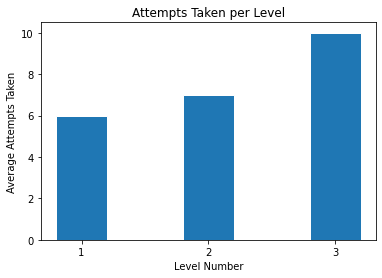

In [41]:
plt.bar([i for i in levels], newat, width = 0.4, edgecolor="white")
plt.xlabel("Level Number")
plt.ylabel("Average Attempts Taken")
plt.title("Attempts Taken per Level")
plt.xticks([1,2,3])
plt.show()

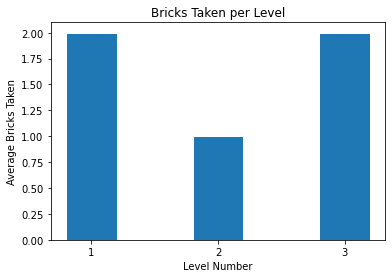

In [43]:
plt.bar([i for i in levels], newbr, width = 0.4, edgecolor="white")
plt.xlabel("Level Number")
plt.ylabel("Average Bricks Taken")
plt.title("Bricks Taken per Level")
plt.xticks([1,2,3])
plt.show()

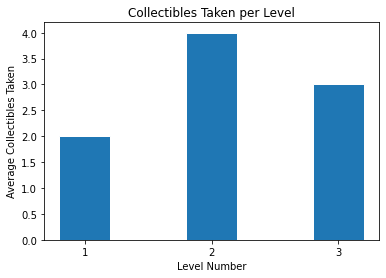

In [45]:
plt.bar([i for i in levels], newcoll, width = 0.4, edgecolor="white") 
plt.xlabel("Level Number")
plt.ylabel("Average Collectibles Taken")
plt.title("Collectibles Taken per Level")
plt.xticks([1,2,3])
plt.show()

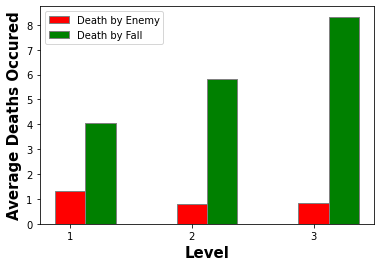

In [47]:
br1 = [i for i in levels]
br2 = [i + 0.25 for i in br1]
 
# Make the plot
plt.bar(br1, newdbe, color ='r', width = 0.25,
        edgecolor ='grey', label ='Death by Enemy')
plt.bar(br2, newdbf, color ='g', width = 0.25,
        edgecolor ='grey', label ='Death by Fall')
plt.xlabel('Level', fontweight ='bold', fontsize = 15)
plt.ylabel('Average Deaths Occured', fontweight ='bold', fontsize = 15)
plt.xticks([1,2,3])
plt.legend()
plt.show()

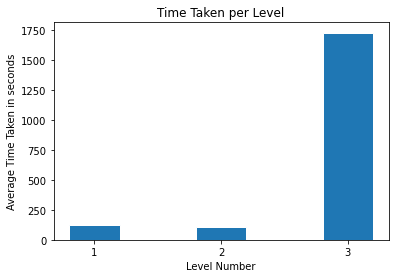

In [48]:
plt.bar([i for i in levels], newtt, width = 0.4, edgecolor="white") 
plt.xlabel("Level Number")
plt.ylabel("Average Time Taken in seconds")
plt.title("Time Taken per Level")
plt.xticks([1,2,3])
plt.show()

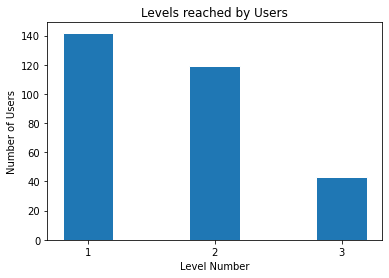

In [49]:
plt.bar([i for i in levels], newsesh, width = 0.4, edgecolor="white") 
plt.xlabel("Level Number")
plt.ylabel("Number of Users")
plt.title("Levels reached by Users")
plt.xticks([1,2,3])
plt.show()